In [2]:
import pandas as pd #for handling csv and csv contents
from rdflib import Graph, Literal, RDF,RDFS, URIRef, Namespace #basic RDF handling
from rdflib.namespace import FOAF , XSD #most common namespaces
import urllib.parse #for parsing strings to URI's

import math
import numpy as np

import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot

#### defining URIs

In [12]:
uri = Namespace('http://exampleDb.org/')

In [13]:
#classes
Paper = uri['Paper']

#subclasses of paper
poster = uri['poster']
shortPaper = uri['shortPaper']
fullPaper = uri['fullPaper']
demoPaper = uri['demoPaper']
#class 
Publication = uri['Publication']
review = uri['review']

#class
Person = uri['Person']

#subclasses of person
reviewer = uri['reviewer']
chair = uri['chair']
editor = uri['editor']
author = uri['author']

#class 
area = uri['area']

#subclasses of area
ml = uri['ml']
db = uri['db']
nlp = uri['nlp']

#class 
venue = uri['venue']

#subclasses of venue
journal = uri['journal']
conference = uri['conference']

##subclasses of conference
workshops = uri['workshops']
symposiums = uri['symposiums']
expertGrou = uri['expertGroups']
regularConferences = uri['regularConferences']

#properties 

#paper acceptedfor publication 
accepted = uri['acceptedfor']
#relatedArea
relatedto = uri['relatedto']
#paper submittedIn
submittedIn = uri['submittedIn']
#author wrote paper
wrote = uri['wrote']
#reviewer Submitted review
R_submitted = uri['submitted']
#review about paper
r_about = uri['reviewAbout']



###########
#venue name
vname = uri["venueName"]

# paper name
pname =  uri["paperName"]

# person name
person_name = uri["personName"]

# area name
a_name = uri["areaName"]

# publication name and year
pub_name = uri["publicationName"]
pub_year = uri["year"]

#review decision and comments
r_decision = uri["decision"]
r_comments = uri["comments"]

# chair handles 
chandles = uri["handledByC"]
# editor handles
ehandles = uri["handledByE"]

In [14]:
def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()
    display(Image(png))

In [15]:
g = Graph()
g.parse("ptbox.ttl")

<Graph identifier=N8fcf2155bdb048469d1a9acc2ae207db (<class 'rdflib.graph.Graph'>)>


(dot.exe:20920): Pango-WARNING **: couldn't load font "DejaVu Sans Bold Not-Rotated 14", falling back to "Sans Bold Not-Rotated 14", expect ugly output.

(dot.exe:20920): Pango-WARNING **: couldn't load font "DejaVu Sans Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.

(dot.exe:20920): Pango-WARNING **: couldn't load font "DejaVu Sans Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0514256 to fit



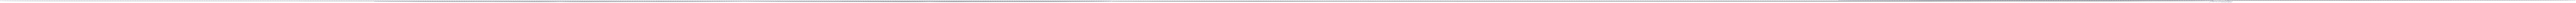

In [19]:
visualize(g)

# Abox

## Person

In [17]:
url='processed_data/'
# we divided person's data into 4 subclasses  
auth_sixty= pd.read_csv(url+"authors.csv",sep=",")
review_twenty = pd.read_csv(url+"reviewers.csv",sep=",")
chair_ten= pd.read_csv(url+"chairs.csv",sep=",")
editor_ten= pd.read_csv(url+"editors.csv",sep=",")

In [18]:
for index, row in auth_sixty.iterrows():
    g.add((author+"/"+str(row['ID']),RDF.type,author) )
    g.add((author+"/"+str(row['ID']),person_name, Literal(row['name'], datatype=XSD.string)) )
    
for index, row in review_twenty.iterrows():
    g.add((reviewer+"/"+str(row['ID']),RDF.type,reviewer) )
    g.add((reviewer+"/"+str(row['ID']),person_name, Literal(row['name'], datatype=XSD.string)) )

for index, row in chair_ten.iterrows():
    g.add((chair+"/"+str(row['ID']),RDF.type,chair) )
    g.add((chair+"/"+str(row['ID']),person_name, Literal(row['name'], datatype=XSD.string)) )

for index, row in editor_ten.iterrows():
    g.add((editor+"/"+str(row['ID']),RDF.type,editor) )
    g.add((editor+"/"+str(row['ID']),person_name, Literal(row['name'], datatype=XSD.string)) )

## articles with names

In [20]:
Name_articles = pd.read_csv(url+"articles.csv",sep =",")

In [21]:
# articles types
for index, row in Name_articles[Name_articles['Papertype'] == 'fullPaper'].iterrows():
    g.add((fullPaper+"/"+str(row['ID']),RDF.type,fullPaper) )
    g.add((fullPaper+"/"+str(row['ID']),pname, Literal(row['title'], datatype=XSD.string)) )
  
    

for index, row in Name_articles[Name_articles['Papertype'] == 'demoPaper'].iterrows():
    g.add((demoPaper+"/"+str(row['ID']),RDF.type,demoPaper) )
    g.add((demoPaper+"/"+str(row['ID']),pname, Literal(row['title'], datatype=XSD.string)) )


for index, row in Name_articles[Name_articles['Papertype'] == 'shortPaper'].iterrows():
    g.add((shortPaper+"/"+str(row['ID']),RDF.type,shortPaper) )
    g.add((shortPaper+"/"+str(row['ID']),pname, Literal(row['title'], datatype=XSD.string)) )
    

for index, row in Name_articles[Name_articles['Papertype'] == 'Poster'].iterrows():
    g.add((poster+"/"+str(row['ID']),RDF.type,poster) )
    g.add((poster+"/"+str(row['ID']),pname, Literal(row['title'], datatype=XSD.string)) )
   
    

## articles written by author

In [22]:
auth_art = pd.read_csv(url+"articles_written_by_author.csv",sep=",")

In [23]:
NArt = pd.merge(auth_art, Name_articles, how='left', left_on='article_ID', right_on='ID')

In [24]:
NArt.drop(['ID_y','volume','DOI'],axis=1,inplace =True)

In [26]:
# author wrote article

for index, row in NArt[NArt['Papertype'] == 'fullPaper'].iterrows():
    g.add((author+"/"+str(row['ID_x']),wrote,fullPaper+"/"+str(row['article_ID'])))
    

for index, row in NArt[NArt['Papertype'] == 'demoPaper'].iterrows():
    g.add((author+"/"+str(row['ID_x']),wrote,fullPaper+"/"+str(row['article_ID'])))


for index, row in NArt[NArt['Papertype'] == 'shortPaper'].iterrows():
    g.add((author+"/"+str(row['ID_x']),wrote,fullPaper+"/"+str(row['article_ID'])))
    

for index, row in NArt[NArt['Papertype'] == 'Poster'].iterrows():
    g.add((author+"/"+str(row['ID_x']),wrote,fullPaper+"/"+str(row['article_ID'])))
   
    

    

## Publication

### PublishedIn

In [29]:
publishedIn = pd.read_csv('kaggle_data_processed/article_published_by.csv')


In [33]:
pN = pd.read_csv(url+"publications_with_years.csv",sep=',')

In [34]:
for index,row in pN.iterrows():
    g.add((Publication+"/"+str(row['ID']),RDF.type,Publication) )
    g.add((Publication+"/"+str(row['ID']),pub_name, Literal(row['name'], datatype=XSD.string)))
    g.add((Publication+"/"+str(row['ID']),pub_year, Literal(row['year'], datatype=XSD.decimal)))

In [35]:
published = pd.merge( publishedIn, pN, left_on=['publisher_ID','year'] ,right_on=['ID','year'])

In [37]:
NPub = pd.merge(Name_articles, published,  left_on='ID', right_on='article_ID')

In [38]:
NPub = NPub[NPub['publisher_ID']<=404]

In [39]:
NPub = NPub.drop_duplicates()

In [40]:
NPub.drop(['ID_y'],axis=1,inplace =True)

## paper related to area

In [41]:
g.add((ml,a_name, Literal('Machine_learning', datatype=XSD.string)))
g.add((db,a_name, Literal('Databases', datatype=XSD.string)))
g.add((nlp,a_name, Literal('Natural_language_Processing', datatype=XSD.string)))


<Graph identifier=N8fcf2155bdb048469d1a9acc2ae207db (<class 'rdflib.graph.Graph'>)>

In [ ]:
area_list =[ml,db,nlp]


## articles related area


In [ ]:
for index, row in NPub[NPub['Papertype'] == 'fullPaper'].iterrows():
    g.add((fullPaper+"/"+str(row['article_ID']),relatedto,URIRef(np.random.choice(area_list))) )
    
    
for index, row in NPub[NPub['Papertype'] == 'demoPaper'].iterrows():
    g.add((demoPaper+"/"+str(row['article_ID']),relatedto,URIRef(np.random.choice(area_list))))
   
for index, row in NPub[NPub['Papertype'] == 'shortPaper'].iterrows():
    g.add((shortPaper+"/"+str(row['article_ID']),relatedto,URIRef(np.random.choice(area_list))))

for index, row in NPub[NPub['Papertype'] == 'Poster'].iterrows():
    g.add((poster+"/"+str(row['article_ID']),relatedto,URIRef(np.random.choice(area_list))))

## paper accepted in publication

In [42]:
for index, row in NPub[NPub['Papertype'] == 'fullPaper'].iterrows():
    g.add((fullPaper+"/"+str(row['article_ID']),accepted,Publication+"/"+str(row['publisher_ID'])))    
    
    
for index, row in NPub[NPub['Papertype'] == 'demoPaper'].iterrows():
    g.add((demoPaper+"/"+str(row['article_ID']),accepted,Publication+"/"+str(row['publisher_ID'])))  
   

for index, row in NPub[NPub['Papertype'] == 'shortPaper'].iterrows():
    g.add((shortPaper+"/"+str(row['article_ID']),accepted,Publication+"/"+str(row['publisher_ID'])))  
   
for index, row in NPub[NPub['Papertype'] == 'Poster'].iterrows():
    g.add((poster+"/"+str(row['article_ID']),accepted,Publication+"/"+str(row['publisher_ID'])))  

## conference

In [44]:
conf = pd.read_csv(url+"conference_withChair_sub.csv",sep=',')


In [45]:

for index, row in conf[conf['Conferencetype'] == 'workshops'].iterrows():
    g.add((workshops+"/"+str(row['ID']),RDF.type,workshops) )
    g.add((workshops+"/"+str(row['ID']),vname, Literal(row['name'], datatype=XSD.string)) )
    g.add((workshops+"/"+str(row['ID']),chandles,chair+"/"+str(row['chairID']) ))
     
    
    
for index, row in conf[conf['Conferencetype'] == 'symposiums'].iterrows():
    g.add((symposiums+"/"+str(row['ID']),RDF.type,symposiums) )
    g.add((symposiums+"/"+str(row['ID']),vname, Literal(row['name'], datatype=XSD.string)) )
    g.add((symposiums+"/"+str(row['ID']),chandles,chair+"/"+str(row['chairID']) ))

for index, row in conf[conf['Conferencetype'] == 'expertGroups'].iterrows():
    g.add((expertGrou+"/"+str(row['ID']),RDF.type,expertGrou) )
    g.add((expertGrou+"/"+str(row['ID']),vname, Literal(row['name'], datatype=XSD.string)) )
    g.add((expertGrou+"/"+str(row['ID']),chandles,chair+"/"+str(row['chairID']) ))

for index, row in conf[conf['Conferencetype'] == 'regularConferences'].iterrows():
    g.add((regularConferences+"/"+str(row['ID']),RDF.type,regularConferences) )
    g.add((regularConferences+"/"+str(row['ID']),vname, Literal(row['name'], datatype=XSD.string)) )
    g.add((regularConferences+"/"+str(row['ID']),chandles,chair+"/"+str(row['chairID']) ))

### paper submitted in conference

In [47]:
All = pd.merge(NPub[NPub['Type']=='Conference Paper'],conf , left_on='publisher_ID', right_on='ID')

In [48]:
for index, row in All.loc[(All['Papertype'] == 'fullPaper') & (All['Conferencetype'] == 'workshops')].iterrows():
    g.add((fullPaper+"/"+str(row['article_ID']),submittedIn,workshops+"/"+str(row['ID'])))   
    
for index, row in All.loc[(All['Papertype'] == 'fullPaper') & (All['Conferencetype'] == 'symposiums')].iterrows():
    g.add((fullPaper+"/"+str(row['article_ID']),submittedIn,symposiums+"/"+str(row['ID']))) 
    
for index, row in All.loc[(All['Papertype'] == 'fullPaper') & (All['Conferencetype'] == 'expertGroups')].iterrows():
    g.add((fullPaper+"/"+str(row['article_ID']),submittedIn,expertGrou+"/"+str(row['ID']))) 
    
for index, row in All.loc[(All['Papertype'] == 'fullPaper') & (All['Conferencetype'] == 'regularConferences')].iterrows():
    g.add((fullPaper+"/"+str(row['article_ID']),submittedIn,regularConferences+"/"+str(row['ID']))) 
    

    
for index, row in All.loc[(All['Papertype'] == 'demoPaper') & (All['Conferencetype'] == 'workshops')].iterrows():
    g.add((demoPaper+"/"+str(row['article_ID']),submittedIn,workshops+"/"+str(row['ID'])))   
    
for index, row in All.loc[(All['Papertype'] == 'demoPaper') & (All['Conferencetype'] == 'symposiums')].iterrows():
    g.add((demoPaper+"/"+str(row['article_ID']),submittedIn,symposiums+"/"+str(row['ID']))) 
    
for index, row in All.loc[(All['Papertype'] == 'demoPaper') & (All['Conferencetype'] == 'expertGroups')].iterrows():
    g.add((demoPaper+"/"+str(row['article_ID']),submittedIn,expertGrou+"/"+str(row['ID']))) 
    
for index, row in All.loc[(All['Papertype'] == 'demoPaper') & (All['Conferencetype'] == 'regularConferences')].iterrows():
    g.add((demoPaper+"/"+str(row['article_ID']),submittedIn,regularConferences+"/"+str(row['ID'])))
    
    
    
for index, row in All.loc[(All['Papertype'] == 'shortPaper') & (All['Conferencetype'] == 'workshops')].iterrows():
    g.add((shortPaper+"/"+str(row['article_ID']),submittedIn,workshops+"/"+str(row['ID'])))   
    
for index, row in All.loc[(All['Papertype'] == 'shortPaper') & (All['Conferencetype'] == 'symposiums')].iterrows():
    g.add((shortPaper+"/"+str(row['article_ID']),submittedIn,symposiums+"/"+str(row['ID']))) 
    
for index, row in All.loc[(All['Papertype'] == 'shortPaper') & (All['Conferencetype'] == 'expertGroups')].iterrows():
    g.add((shortPaper+"/"+str(row['article_ID']),submittedIn,expertGrou+"/"+str(row['ID']))) 
    
for index, row in All.loc[(All['Papertype'] == 'shortPaper') & (All['Conferencetype'] == 'regularConferences')].iterrows():
    g.add((shortPaper+"/"+str(row['article_ID']),submittedIn,regularConferences+"/"+str(row['ID']))) 
    


for index, row in All.loc[(All['Papertype'] == 'Poster') & (All['Conferencetype'] == 'workshops')].iterrows():
    g.add((poster+"/"+str(row['article_ID']),submittedIn,workshops+"/"+str(row['ID'])))   
    
for index, row in All.loc[(All['Papertype'] == 'Poster') & (All['Conferencetype'] == 'symposiums')].iterrows():
    g.add((poster+"/"+str(row['article_ID']),submittedIn,symposiums+"/"+str(row['ID']))) 
    
for index, row in All.loc[(All['Papertype'] == 'Poster') & (All['Conferencetype'] == 'expertGroups')].iterrows():
    g.add((poster+"/"+str(row['article_ID']),submittedIn,expertGrou+"/"+str(row['ID']))) 
    
for index, row in All.loc[(All['Papertype'] == 'Poster') & (All['Conferencetype'] == 'regularConferences')].iterrows():
    g.add((poster+"/"+str(row['article_ID']),submittedIn,regularConferences+"/"+str(row['ID']))) 

   


# journals handled by editors

In [49]:
jour = pd.read_csv(url+"journal_withEditor.csv",sep=',')

In [50]:
for index, row in jour.iterrows():
    g.add((journal+"/"+str(row['ID']),RDF.type,journal))
    g.add((journal+"/"+str(row['ID']),vname, Literal(row['name'], datatype=XSD.string)))
    g.add((journal+"/"+str(row['ID']),ehandles, editor+"/"+str(row['editorID'])))

### submitted In journals

In [51]:
All_j = pd.merge(NPub[NPub['Type']=='Journal'],jour , how='left', left_on='publisher_ID', right_on='ID')

In [52]:
for index, row in All_j[All_j['Papertype'] == 'fullPaper'].iterrows():
    g.add((fullPaper+"/"+str(row['article_ID']),submittedIn,journal+"/"+str(row['ID'])))    
    
    
for index, row in All_j[All_j['Papertype'] == 'demoPaper'].iterrows():
    g.add((demoPaper+"/"+str(row['article_ID']),submittedIn,journal+"/"+str(row['ID'])))  
   

for index, row in All_j[All_j['Papertype'] == 'shortPaper'].iterrows():
    g.add((shortPaper+"/"+str(row['article_ID']),submittedIn,journal+"/"+str(row['ID'])))  
   
for index, row in All_j[All_j['Papertype'] == 'Poster'].iterrows():
    g.add((poster+"/"+str(row['article_ID']),submittedIn,journal+"/"+str(row['ID'])))  

### reviews

In [54]:
reviews_df = pd.read_csv(url +"reviews.csv",sep=',')

In [55]:
for index, row in reviews_df.iterrows():
    g.add((review+"/"+str(index),RDF.type,review))
    g.add((reviewer+"/"+str(row['Reviewer_ID']),R_submitted,review+"/"+str(index)))  
    g.add((review+"/"+str(index),r_decision,Literal(row['decision'], datatype=XSD.string)))
    g.add((review+"/"+str(index),r_comments,Literal(row['comments'], datatype=XSD.string)))
    g.add((review+"/"+str(index),r_about,Paper+"/"+str(row['paper_id'])))
    
    
    

In [56]:
# Save the results to disk
g.serialize('abox.ttl',format='turtle')

<Graph identifier=N8fcf2155bdb048469d1a9acc2ae207db (<class 'rdflib.graph.Graph'>)>